# IFN Tutorial

by [*Kardi Teknomo*](https://people.revoledu.com/kardi/)

IFN is reusable Python library for Ideal Flow Network (IFN). The library of IFN itself is quite generic that it can be useful for any network, not just IFN. If you are interested in using IFN for general network, refer to [IFN Tutorial for General Network](tutorial.html).

In this tutorial, our focus is on the Ideal Flow Network (IFN) itself.


To use IFN module, we first need to import it. We also need to se numpy, thus, we also import it.

In [1]:
import IdealFlow.Network as net
import numpy as np

n = net.IFN(name="IFN")
print(n.name)
print(n)  # print the string of adjacency list

IFN
{}


## IFN from Links

Can create a network add links. A link is a directed edge from start node to end node.

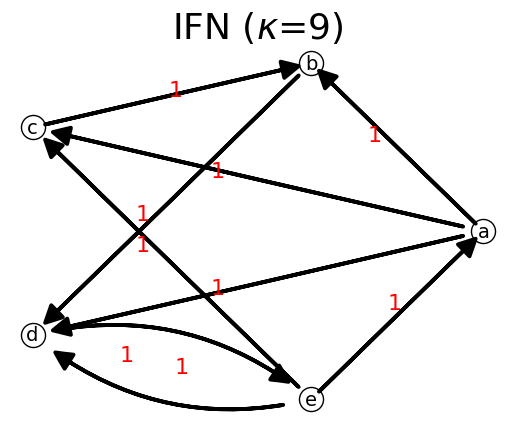

In [2]:
n.add_link("a","b")
n.add_link("a","c")
n.add_link("a","d")
n.add_link("d","e")
n.add_link("e","a")
n.add_link("e","d")
n.add_link("c","b")
n.add_link("b","d")
n.add_link("e","c")
n.show("Circular");

The capacity matrix is shown as follow. The positive numbers represent the number of lanes in the links. Zero means no links between nodes.

In [3]:
C, list_nodes = n.get_matrix()
print('list_nodes:', list_nodes)
C

list_nodes: ['a', 'b', 'c', 'd', 'e']


[[0, 1, 1, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [1, 0, 1, 1, 0]]

The adjacency matrix of the capacity matrix that is strongly connected is always irreducible matrix. Let us test using the following code.

In [4]:
A=n.capacity_to_adjacency(C)
print('Is irreducible?',n.is_irreducible_matrix(A))
print('A',A)

Is irreducible? True
A [[0 1 1 1 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 1 1 0]]


From the Capacity matrix, we can compute the Stochastic matrix as follow

In [5]:
S=n.capacity_to_stochastic(C)
print('stochastic matrix=\n',S)

stochastic matrix=
 [[0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]]


We can check network efficiency based on the entropy ratio. A network is efficient if it has maximum entropy. Efficient network happens if the outflow probability distribution in each node is uniformly distributed in term of time and space. In this example the network efficiency is the same as the entropy ratio.

In [6]:
print('Entropy=', n.stochastic_to_network_entropy(S))
print('Entropy ratio=', n.stochastic_to_entropy_ratio(S))

Entropy= 2.197224577336219
Entropy ratio= 1.0


Now we can compute the ideal flow matrix F that represents the steady state flow in each link.

In [7]:
F=n.capacity_to_ideal_flow(C)
print('Ideal Flow matrix=\n', F)

Ideal Flow matrix=
 [[0.         0.03333333 0.03333333 0.03333333 0.        ]
 [0.         0.         0.         0.16666667 0.        ]
 [0.         0.13333333 0.         0.         0.        ]
 [0.         0.         0.         0.         0.3       ]
 [0.1        0.         0.1        0.1        0.        ]]


Notice that the sum of rows and sum of columns of an ideal flow matrix are always the same.

In [8]:
sR=n.sum_of_row(F)
sC=n.sum_of_col(F)
print('sum of row=',sR,'\n')
print('sum of columns=',sC,'\n')

sum of row= [0.1        0.16666667 0.13333333 0.3        0.3       ] 

sum of columns= [0.1        0.16666667 0.13333333 0.3        0.3       ] 



Premagic matrix means the matrix has exactly the same sum of rows as the sum of columns.

In [9]:
print('isPremagic(F)=',n.is_premagic_matrix(F))

isPremagic(F)= True


Ideal flow matrix is defined as premagic (the flow are conserved) and strongly connected (irreducible)

In [10]:
print('isIrreducible(F)=', n.is_irreducible_matrix(F))
print('is Ideal Flow(F)=', n.is_ideal_flow_matrix(F))

isIrreducible(F)= True
is Ideal Flow(F)= True


## IFN from Matrix

In the following example, we will examine an efficient network. Let us define an adjacency matrix.

In [11]:
#   a  b  c  d  
A=[[0, 0, 1, 1],   # a
   [1, 0, 0, 0],   # b
   [0, 1, 0, 1],   # c
   [0, 1, 0, 0],   # d
  ]
A=np.asarray(A)
A

array([[0, 0, 1, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 0, 0]])

We can put this matrix into network by setting the list of nodes and set the matrix.

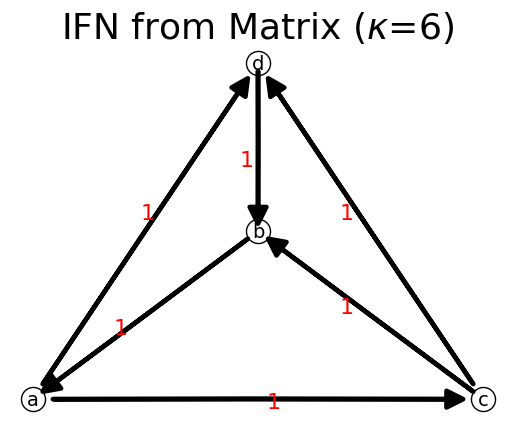

In [12]:
n = net.IFN(name="IFN from Matrix")  # new network
num_nodes=4
list_nodes=n.alphabet_list(num_nodes)
n.set_matrix(A,list_nodes)
n.show();

We can obtain the ideal flow directly from adjacency matrix and the outflow probability distribution of each node would be equal (uniform distribution).

In [13]:
F=n.adjacency_to_ideal_flow(A)
print('F=',F,'\n')

F= [[0.         0.         0.15384615 0.15384615]
 [0.30769231 0.         0.         0.        ]
 [0.         0.07692308 0.         0.07692308]
 [0.         0.23076923 0.         0.        ]] 



The sum of rows of ideal flow matrix is always equal to the sum of columns. This property is called *premagic* property.

In [14]:
sR=n.sum_of_row(F)
sC=n.sum_of_col(F)
print('sum of row=\n',sR)
print('sum of columns=\n',sC)
print('isPremagic(F)=',n.is_premagic_matrix(F))

sum of row=
 [0.30769231 0.30769231 0.15384615 0.23076923]
sum of columns=
 [0.30769231 0.30769231 0.15384615 0.23076923]
isPremagic(F)= True


We can easily scale ideal flow matrix by a scaling factor, kappa $\kappa$, which is the same as the total flow.

In [15]:
kappa=1000
F=n.adjacency_to_ideal_flow(A, kappa)
print('F=\n',F)

F=
 [[  0.           0.         153.84615385 153.84615385]
 [307.69230769   0.           0.           0.        ]
 [  0.          76.92307692   0.          76.92307692]
 [  0.         230.76923077   0.           0.        ]]


We can get back the stochastic matrix based on ideal flow matrix.

In [16]:
S=n.ideal_flow_to_stochastic(F)
print('S=\n',S)

S=
 [[0.  0.  0.5 0.5]
 [1.  0.  0.  0. ]
 [0.  0.5 0.  0.5]
 [0.  1.  0.  0. ]]


Observe that our entropy ratio is 1, that means a network with uniform distribution of outflow is the most efficient network. The proof of this theorem can be found in a paper in [EASTS journal](https://www.jstage.jst.go.jp/article/easts/12/0/12_939/_pdf/-char/en).

In [17]:
print('Entropy=', n.stochastic_to_network_entropy(S))
print('Entropy ratio=', n.stochastic_to_entropy_ratio(S))

Entropy= 1.3862943611198906
Entropy ratio= 1.0


## IFN from Trajectories

One of many novelty point of IFN is the idea of expandable network based on trajectories.
Trajectories are sequences of points in the feature space that are connected by edges.
In IFN, trajectories are represented by a path or a node sequence.


{'a': {'b': 1}, 'b': {'c': 1}, 'c': {'d': 1}, 'd': {}}


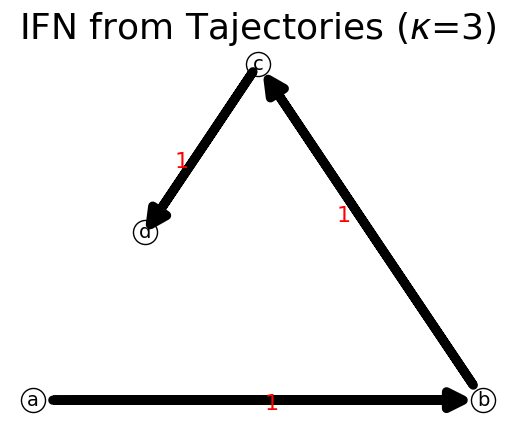

In [18]:
n = net.IFN(name="IFN from Tajectories")  # new network
tr1 = ['a','b','c', 'd']
n.set_path(tr1)
print(n)  # print the string of adjacency list
n.show(); 

We can test if our network is connected. Pretend the arrows are ignored for a moment, is there any path from any node to any other node?

In [19]:
print('is connected?',n.is_connected)  # if two ways/undirected

is connected? True


our network is not connected yet.




Having a network does not mean it is an Ideal Flow Network (IFN). We can test if our network is already an ideal flow. An ideal flow network is a network which is both strongly connected and premagic. Let us test whether it is strongly connected.

In [20]:
print('is strongly connected?',n.is_strongly_connected)

is strongly connected? False


Premagic means balance of flow. A flow is balance when in each node, the sum of inflows is exactly equal to the sum of outflows. Let us test whether our network is premagic.

In [21]:
print('is premagic?',n.is_premagic)

is premagic? False


We can test whether our network is an ideal flow type.

In [22]:
print('is Ideal Flow?',n.is_ideal_flow)

is Ideal Flow? False


We can add more trajectory to expand the network. Then we test the updated network again.

{'a': {'b': 1}, 'b': {'c': 1, 'e': 1}, 'c': {'d': 1, 'b': 1}, 'd': {'c': 1}, 'e': {'d': 1}}


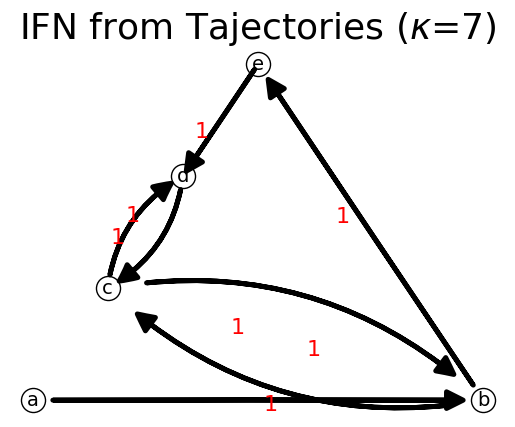

is connected? True 

is strongly connected? False 

is premagic? False 

is Ideal Flow? False 



In [23]:
tr2 = ['e', 'd', 'c', 'b', 'e']
n.set_path(tr2)
print(n)  # print the string of adjacency list
n.show(); 
print('is connected?',n.is_connected,'\n')  # if two ways/undirected
print('is strongly connected?',n.is_strongly_connected,'\n') # if we follow the arrows
print('is premagic?',n.is_premagic,'\n')
print('is Ideal Flow?',n.is_ideal_flow,'\n')


Our network is still weakly connected. If the ignore the directional arrows, it is connected but wen we follow the directional arrows, it is not connected. 


To make a connected network into a strongly connected network, we add a cloud node and dummy link from sink node to the cloud node, and from the cloud node to source node.

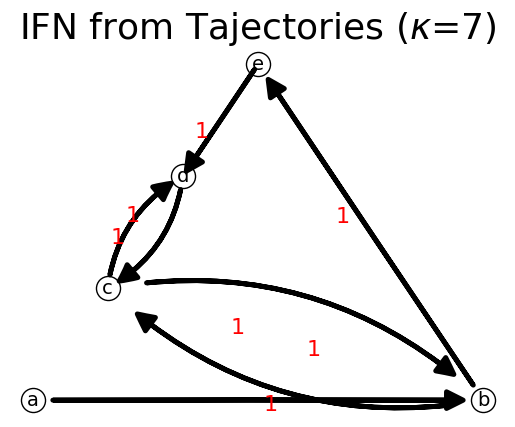

In [24]:
n.show();

Now we can see that the network is indeed strongly connected.

In [25]:
print('is strongly connected?',n.is_strongly_connected,'\n')

is strongly connected? False 



Then we test if it premagic.

In [26]:
print('is premagic?',n.is_premagic,'\n')

is premagic? False 



To make the network connected, we can add link from any node of the component 'bedc' to the sink node 'a'

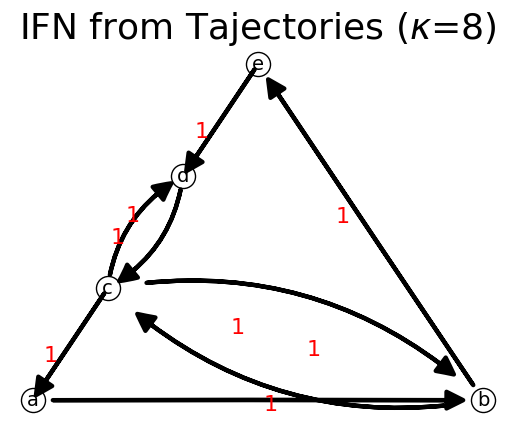

{'a': {'b': 1}, 'b': {'c': 1, 'e': 1}, 'c': {'d': 1, 'b': 1, 'a': 1}, 'd': {'c': 1}, 'e': {'d': 1}}
is connected? True 

is strongly connected? True 

is premagic? False 

is Ideal Flow? False 



In [27]:
n.add_link('c', 'a')
n.show(); 
print(n)  # print the string of adjacency list
print('is connected?',n.is_connected,'\n')  # if two ways/undirected
print('is strongly connected?',n.is_strongly_connected,'\n') # if we follow the arrows
print('is premagic?',n.is_premagic,'\n')
print('is Ideal Flow?',n.is_ideal_flow,'\n')

By now, our network is already strongly connected but still not premagic yet.
We need to add more trajectories to make it premagic.

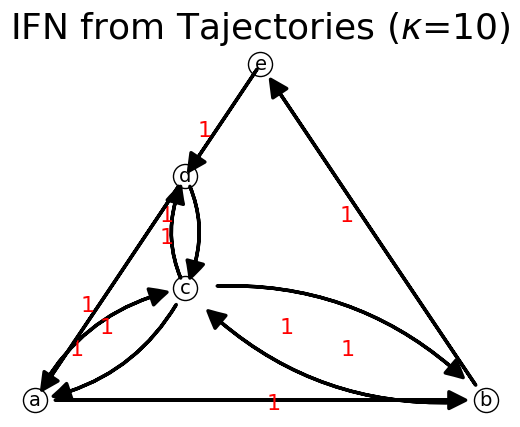

{'a': {'b': 1, 'c': 1}, 'b': {'c': 1, 'e': 1}, 'c': {'d': 1, 'b': 1, 'a': 1}, 'd': {'c': 1, 'a': 1}, 'e': {'d': 1}}
is connected? True 

is strongly connected? True 

is premagic? True 

is Ideal Flow? True 



In [28]:
tr3 = ['d', 'a', 'c']
n.set_path(tr3)
n.show(); 
print(n)  # print the string of adjacency list

print('is connected?',n.is_connected,'\n')  # if two ways/undirected
print('is strongly connected?',n.is_strongly_connected,'\n') # if we follow the arrows
print('is premagic?',n.is_premagic,'\n')
print('is Ideal Flow?',n.is_ideal_flow,'\n')


By now our network is already an ideal flow network (IFN).

How do we get the last trajectory (*tr3*) that make it into an ideal flow? Is it by trial and error? No, it actually can be formed easily by making cycles from the existing trajectories. Observed that *tr2 = ['e', 'd', 'c', 'b', 'e']* is already a cycle, thus we can simply ignore.

> tr1 = ['a','b','c', 'd']

and then we added a branch by 

> n.add_link('c', 'a')

We have link'ca' and 'abc' (from *tr1*) that forms a cycle.

The remaining path to make the cycle within the existing network is 'dac'. Thus,
> tr3 = ['d', 'a', 'c']

## IFN from Cycles

In the last section, how do we know that we need to form cycles in order to create IFN? It is based on the [Ideal Flow mathematical theory](https://arxiv.org/abs/2408.06344) that when we merge any cycles with certain pivot (i.e. connecting node, link, or path), it would always form an strongly connected network which is premagic.

In this section let us demonstrate that we can create IFN by merging cycles.
We will use the following example to demonstrate this.

Let us create a new network.

In [29]:
n = net.IFN(name="IFN from Cycles")
print(n.name)
print(n)  # print the string of adjacency list

IFN from Cycles
{}


## Equivalent IFN

To make a strongly connected network into ideal flow network, first, let us assume the existing weight as capacity matrix

In [30]:
n = net.IFN("Random Irreducible Network")
numNode=5                         # number of nodes
numLink=numNode+int(3*numNode/4)  # number of links
print("Design Total Nodes:",numNode,'\nDesign Total Links:',numLink)

# using static methods to generate matrix and test matrix
C=n.rand_irreducible(numNode,numLink)       # generate random irreducible matrix
print('C',C)
list_nodes = n.alphabet_list(numNode)       # generate list of nodes 
n.set_matrix(C,list_nodes)
print(n)

Design Total Nodes: 5 
Design Total Links: 8
C [[0 0 0 1 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 1 1]]
{'a': {'d': 1}, 'b': {'e': 1}, 'c': {'b': 1}, 'd': {'c': 1}, 'e': {'a': 1, 'c': 1, 'd': 1, 'e': 1}}


In [31]:
# we can also see it back
C,listNodes=n.get_matrix()
print('C =\n',np.array(C))
print('listNodes =\n',listNodes)

C =
 [[0 0 0 1 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 1 1]]
listNodes =
 ['a', 'b', 'c', 'd', 'e']


If the network is strongly connected, then the matrix must be irreducible.

In [32]:
print('is C irreducible?',n.is_irreducible_matrix(C))

is C irreducible? True


Then we compute the ideal flow from capacity matrix. These values represent link probabilities of flows in the network. The total values is one.

In [33]:
F=n.capacity_to_ideal_flow(C)
n.set_matrix(F,listNodes)
print('Total Flow', n.total_flow)
F

Total Flow 1.0000000000000007


array([[0.        , 0.        , 0.        , 0.07692308, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.23076923],
       [0.        , 0.23076923, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.15384615, 0.        , 0.        ],
       [0.07692308, 0.        , 0.07692308, 0.07692308, 0.07692308]])

The characteristics of ideal flow is irreducible and premagic.

In [34]:
print('is F irreducible?',n.is_irreducible_matrix(F),'\n')
print('is F premagic?',n.is_premagic_matrix(F),'\n')

is F irreducible? True 

is F premagic? True 



Ideal Flow matrix contain rational numbers which are also scalable. We can get the equivalent ideal flow matrix by multiplying it with some global scalling factor. One important scaling is to make the ideal flow into minimum integer. This is also called the *basis network*.

In [35]:
scaling=n.global_scaling(F,scaling_type='int')
print('scaling=',scaling)
F=n.equivalent_ifn(F,scaling)
F

scaling= 13


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 3.],
       [0., 3., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [1., 0., 1., 1., 1.]])

Now we replace the weights of capacity into flow.

In [36]:
n.set_matrix(F,listNodes)
M,_=n.get_matrix()
M

[[0, 0, 0, 1.0000000000000013, 0],
 [0, 0, 0, 0, 3.000000000000002],
 [0, 3.0000000000000013, 0, 0, 0],
 [0, 0, 1.9999999999999998, 0, 0],
 [1.0000000000000004,
  0,
  1.0000000000000004,
  1.0000000000000004,
  1.0000000000000004]]

Let us test again, to make sure all of the properties are satisfied.

In [37]:
print('is M irreducible?',n.is_irreducible_matrix(M),'\n')
print('is ideal flow?',n.is_ideal_flow,'\n')
print('is strongly connected?',n.is_strongly_connected,'\n')
print('is M premagic?',n.is_premagic_matrix(M),'\n')
print('is premagic network?',n.is_premagic,'\n')

is M irreducible? True 

is ideal flow? True 

is strongly connected? True 

is M premagic? True 

is premagic network? True 



### Equivalent IFN

We can scale our ideal flow matrix into an equivalent ideal flow matrix such that the minimum is some predefined value. 

In [38]:
scaling=n.global_scaling(F,scaling_type='min',val=100)
print('scaling=',scaling)
F1=n.equivalent_ifn(F,scaling)
F1

scaling= 99.99999999999996


array([[  0.,   0.,   0., 100.,   0.],
       [  0.,   0.,   0.,   0., 300.],
       [  0., 300.,   0.,   0.,   0.],
       [  0.,   0., 200.,   0.,   0.],
       [100.,   0., 100., 100., 100.]])

We can scale our ideal flow matrix into an equivalent ideal flow matrix such that the maximum is some predefined value. 

In [39]:
scaling=n.global_scaling(F,scaling_type='max',val=10)
print('scaling=',scaling)
F1=n.equivalent_ifn(F,scaling)
F1

scaling= 3.333333333333331


array([[ 0.        ,  0.        ,  0.        ,  3.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 10.        ],
       [ 0.        , 10.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  6.66666667,  0.        ,  0.        ],
       [ 3.33333333,  0.        ,  3.33333333,  3.33333333,  3.33333333]])

We can scale our ideal flow matrix into an equivalent ideal flow matrix such that the sum of flow  is some predefined value. 

In [40]:
scaling=n.global_scaling(F,scaling_type='sum',val=1000)
print('scaling=',scaling)
F1=n.equivalent_ifn(F,scaling)
print('sum: ',np.sum(F1))
F1

scaling= 76.92307692307689
sum:  1000.0


array([[  0.        ,   0.        ,   0.        ,  76.92307692,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        230.76923077],
       [  0.        , 230.76923077,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        , 153.84615385,   0.        ,
          0.        ],
       [ 76.92307692,   0.        ,  76.92307692,  76.92307692,
         76.92307692]])

Lastly, we can also find global scaling to make *basis network*, which is IFN with minimum integers

In [41]:
scaling=n.global_scaling(F,scaling_type='int')
print('scaling=',scaling)
F=n.equivalent_ifn(F,scaling)
F

scaling= 1


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 3.],
       [0., 3., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [1., 0., 1., 1., 1.]])

To set the link values based on the ideal flow matrix, we apply the matrix. Since we want to compare the two IFNs later, instead of replace it in the same network, now we create a new network to be filled with integer IFN.

In [42]:
n2=net.IFN(name="Ideal Flow")  # create new network
n2.set_matrix(np.around(F),listNodes)
n2.get_matrix()                     # check if it is correctly applied

([[0, 0, 0, 1.0, 0],
  [0, 0, 0, 0, 3.0],
  [0, 3.0, 0, 0, 0],
  [0, 0, 2.0, 0, 0],
  [1.0, 0, 1.0, 1.0, 1.0]],
 ['a', 'b', 'c', 'd', 'e'])

Let us test the properties.

is ideal flow True 

is strongly connected True 

is premagic True 



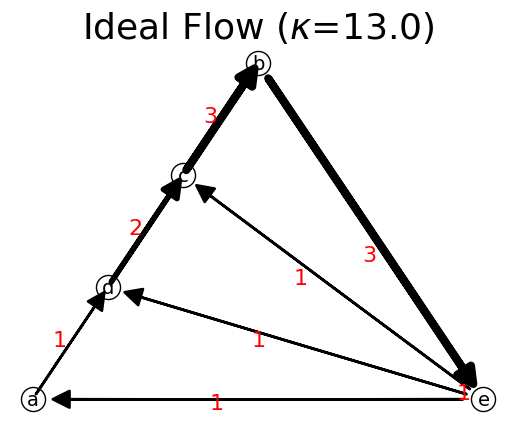

In [43]:
print('is ideal flow',n2.is_ideal_flow,'\n')
print('is strongly connected',n2.is_strongly_connected,'\n')
print('is premagic',n2.is_premagic,'\n')
n2.show();

Equivalent IFNs would have exactly the same stochastic matrix.

In [44]:
S=n.capacity_to_stochastic(F)
S1=n.capacity_to_stochastic(F1)
np.array_equal(S1,S)

True

Equivalent ideal flow would have the same coeficient of variation of flow. Coeffcient of variation is the standard deviation divided by the average. The difference here is due to rounding off error. The total flow of n1 must be 1 but due to round off error, it is not exactly one.

In [45]:
print('total flow of n1:',n.total_flow,'\n')
print('total flow of n2:',n2.total_flow,'\n')
print('coef. variation of n1:',n.cov_flow,'\n')
print('coef. variation of n2:',n2.cov_flow,'\n')

total flow of n1: 13.000000000000005 

total flow of n2: 13.0 

coef. variation of n1: 0.18644922528524344 

coef. variation of n2: 0.18644922528524344 



Observed that the two network is equivalent IFN

In [46]:
n.is_equivalent_ifn(n2)

True

Just in case when our network contains a cloud node, if we want to get the total flow, however, our original network was not include the cloud node. Thus, our total flow in the network is not correct yet because it includes the flow in the dummy links. We have to get the network without cloud node and dummy links (which is not an IFN anymore but we have calculated the ideal flow anyway).

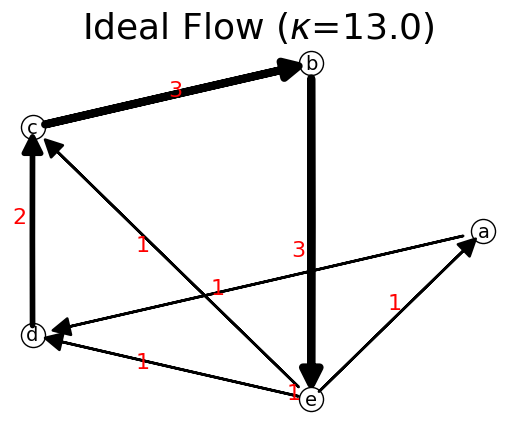

In [47]:
n3=n2.network_delete_cloud()
n3.show("Circular");

Now we can get the correct total flow of the original network.

In [48]:
n3.total_flow

13.0

First update: [Sept 2017](http://people.revoledu.com/kardi/tutorial/Python/Ideal+Flow.html)

Last Update: Oct 2024

Cite this tutorial as:

> Teknomo,K. (2024) Ideal Flow Network Anaysis using Python 

See Also: [Resources on Ideal Flow Network](https://people.revoledu.com/kardi/research/trajectory/ifn/index.html), [IFN Tutorial](https://people.revoledu.com/kardi/tutorial/IFN/)

Copyright © 2024 Kardi Teknomo